In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from lassolver.utils.func import *
from lassolver.utils.signal import *
from lassolver.utils.utils import *

from lassolver.matrices.iid_gauss import iidGaussian
from lassolver.matrices.uni_invar import UniInvar

from lassolver.solver.amp import AMP
from lassolver.solver.oamp import OAMP

from lassolver.dsolver.d_amp import D_AMP
from lassolver.dsolver.d_oamp import D_OAMP

# 数値実験の設定

In [3]:
N = 1000
alpha = 0.5
M = int(alpha*N)
rho = 0.2

In [4]:
kappa = 5
P = 10
T = 30

In [5]:
iidG = iidGaussian(M, N, 0, 1/M)
UniInv = UniInvar(M, N, kappa)
x = bernouli_gaussian(N, rho)
SNR = 60

# i.i.d.ガウス行列での信号再構成

In [6]:
tmp1G = AMP(iidG.A, x, SNR)
tmp2G = D_AMP(iidG.A, x, SNR, P)
tmp3G = OAMP(iidG.A, x, SNR, iidG=True)
tmp4G = D_OAMP(iidG.A, x, SNR, P, iidG=True)

final mse: 0.08726797526855903


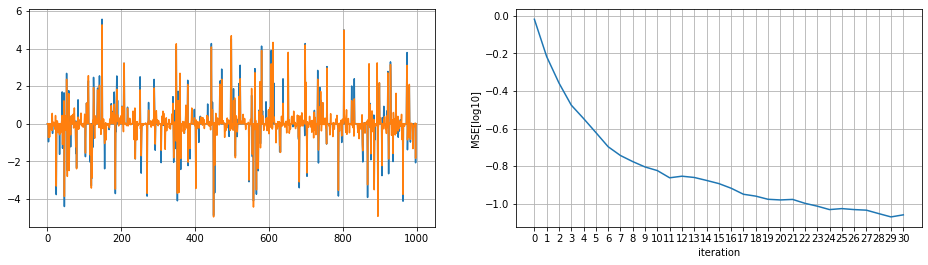

In [7]:
tmp1G.estimate(T=T)
tmp1G.result()

In [8]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp2G.estimate(T=T, log=True)

N(P-1): 9000


Rp: 3609.0 	 F: 153 	 F\Rp: 969
Total Communication Cost: 4578
Rp: 3892.0 	 F: 177 	 F\Rp: 1077
Total Communication Cost: 4969
Rp: 3995.0 	 F: 190 	 F\Rp: 1134
Total Communication Cost: 5129
Rp: 4126.0 	 F: 206 	 F\Rp: 1214
Total Communication Cost: 5340
Rp: 4197.0 	 F: 214 	 F\Rp: 1246
Total Communication Cost: 5443
Rp: 4251.0 	 F: 216 	 F\Rp: 1255
Total Communication Cost: 5506
Rp: 4336.0 	 F: 215 	 F\Rp: 1237
Total Communication Cost: 5573
Rp: 4413.0 	 F: 222 	 F\Rp: 1278
Total Communication Cost: 5691
Rp: 4523.0 	 F: 227 	 F\Rp: 1281
Total Communication Cost: 5804
Rp: 4655.0 	 F: 234 	 F\Rp: 1290
Total Communication Cost: 5945
Rp: 4814.0 	 F: 240 	 F\Rp: 1291
Total Communication Cost: 6105
Rp: 4966.0 	 F: 249 	 F\Rp: 1302
Total Communication Cost: 6268
Rp: 5119.0 	 F: 263 	 F\Rp: 1327
Total Communication Cost: 6446
Rp: 5338.0 	 F: 280 	 F\Rp: 1350
Total Communication Cost: 6688
Rp: 5587.0 	 F: 301 	 F\Rp: 1364
Total Communication Cost: 6951
Rp: 5961.0 	 F: 354 	 F\Rp

final mse: 0.08636252815542642


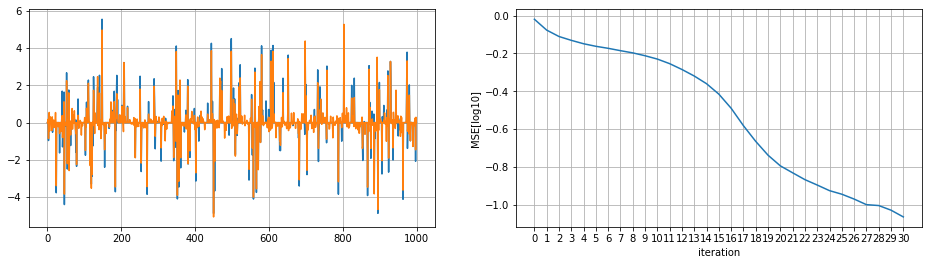

In [9]:
tmp2G.result()

final mse: 0.0038267251870464725


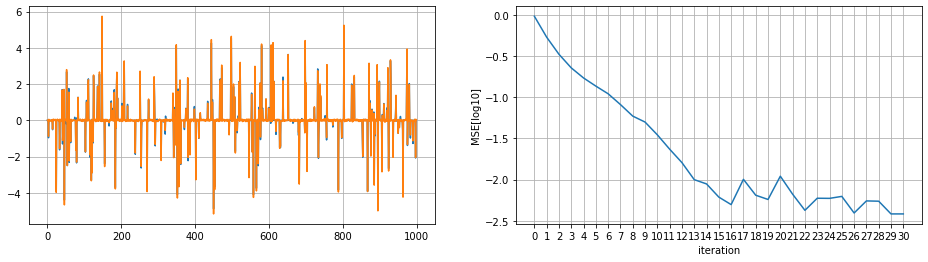

In [10]:
tmp3G.estimate(T=T)
tmp3G.result()

In [11]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp4G.estimate(T=T, log=True)

N(P-1): 9000


Rp: 7656.0 	 F: 388 	 F\Rp: 1083
Total Communication Cost: 8062
Rp: 7702.0 	 F: 394 	 F\Rp: 1071
Total Communication Cost: 8114
Rp: 7692.0 	 F: 374 	 F\Rp: 1037
Total Communication Cost: 8084
Rp: 7618.0 	 F: 406 	 F\Rp: 1182
Total Communication Cost: 8042
Rp: 7642.0 	 F: 431 	 F\Rp: 1240
Total Communication Cost: 8091
Rp: 7677.0 	 F: 396 	 F\Rp: 1122
Total Communication Cost: 8091
Rp: 7740.0 	 F: 405 	 F\Rp: 1115
Total Communication Cost: 8163
Rp: 7745.0 	 F: 390 	 F\Rp: 1073
Total Communication Cost: 8153
Rp: 7706.0 	 F: 406 	 F\Rp: 1111
Total Communication Cost: 8130
Rp: 7740.0 	 F: 425 	 F\Rp: 1151
Total Communication Cost: 8183
Rp: 7642.0 	 F: 403 	 F\Rp: 1156
Total Communication Cost: 8063
Rp: 7666.0 	 F: 422 	 F\Rp: 1175
Total Communication Cost: 8106
Rp: 7639.0 	 F: 401 	 F\Rp: 1165
Total Communication Cost: 8058
Rp: 7671.0 	 F: 428 	 F\Rp: 1214
Total Communication Cost: 8117
Rp: 7737.0 	 F: 428 	 F\Rp: 1170
Total Communication Cost: 8183
Rp: 7640.0 	 F: 436 	 F\R

final mse: 0.008177213119507643


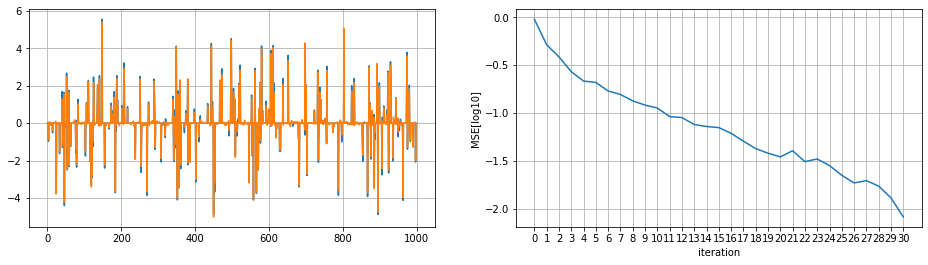

In [12]:
tmp4G.result()

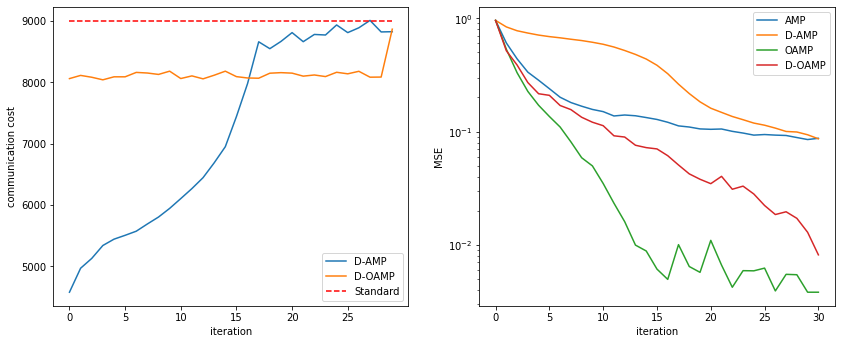

In [13]:
plt.figure(figsize=(14, 5.5))


t1 = np.arange(0, T, 1)

plt.subplot(121)
plt.xlabel('iteration')
plt.ylabel('communication cost')
plt.xticks(np.arange(0, T, 5))

standard = np.array([N * (P - 1) for _ in range(T)])

plt.plot(t1, tmp2G.communication_cost, label='D-AMP')
plt.plot(t1, tmp4G.communication_cost, label='D-OAMP')
plt.plot(t1, standard, ls='--', color='r', label='Standard')
plt.legend()


t2 = np.arange(0, T+1, 1)

plt.subplot(122)
plt.xlabel('iteration')
plt.ylabel('MSE')

plt.xticks(np.arange(0, T+1, 5))
plt.yscale('log')

plt.plot(t2, tmp1G.mse, label="AMP")
plt.plot(t2, tmp2G.mse, label="D-AMP")
plt.plot(t2, tmp3G.mse, label='OAMP')
plt.plot(t2, tmp4G.mse, label='D-OAMP')
plt.legend()

# ユニタリ不変行列での信号再構成

In [15]:
tmp1U = AMP(UniInv.A, x, SNR)
tmp2U = D_AMP(UniInv.A, x, SNR, P)
tmp3U = OAMP(UniInv.A, x, SNR)
tmp4U = D_OAMP(UniInv.A, x, SNR, P)

final mse: 7.118489133370966e+57


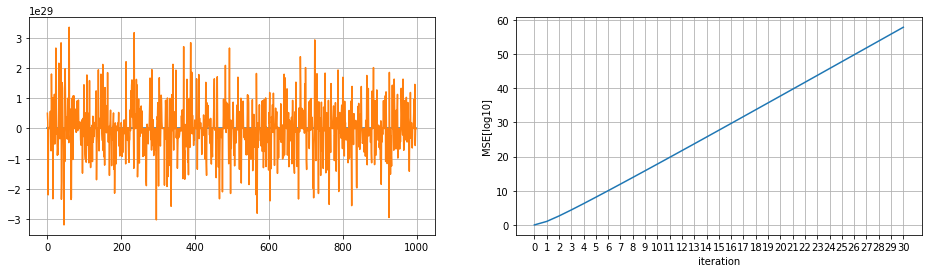

In [16]:
tmp1U.estimate(T=T)
tmp1U.result()

In [17]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp2U.estimate(T=T, log=True)

N(P-1): 9000


Rp: 6484.0 	 F: 415 	 F\Rp: 1599
Total Communication Cost: 8083
Rp: 6229.0 	 F: 384 	 F\Rp: 1479
Total Communication Cost: 7708
Rp: 6454.0 	 F: 363 	 F\Rp: 1345
Total Communication Cost: 7799
Rp: 6495.0 	 F: 366 	 F\Rp: 1338
Total Communication Cost: 7833
Rp: 6530.0 	 F: 370 	 F\Rp: 1309
Total Communication Cost: 7839
Rp: 6575.0 	 F: 372 	 F\Rp: 1270
Total Communication Cost: 7845
Rp: 6629.0 	 F: 371 	 F\Rp: 1276
Total Communication Cost: 7905
Rp: 6666.0 	 F: 365 	 F\Rp: 1254
Total Communication Cost: 7920
Rp: 6679.0 	 F: 370 	 F\Rp: 1282
Total Communication Cost: 7961
Rp: 6700.0 	 F: 367 	 F\Rp: 1255
Total Communication Cost: 7955
Rp: 6721.0 	 F: 366 	 F\Rp: 1235
Total Communication Cost: 7956
Rp: 6744.0 	 F: 371 	 F\Rp: 1254
Total Communication Cost: 7998
Rp: 6757.0 	 F: 390 	 F\Rp: 1297
Total Communication Cost: 8054
Rp: 6778.0 	 F: 393 	 F\Rp: 1315
Total Communication Cost: 8093
Rp: 6806.0 	 F: 388 	 F\Rp: 1290
Total Communication Cost: 8096
Rp: 6851.0 	 F: 393 	 F\R

final mse: 5.72867755402865e+45


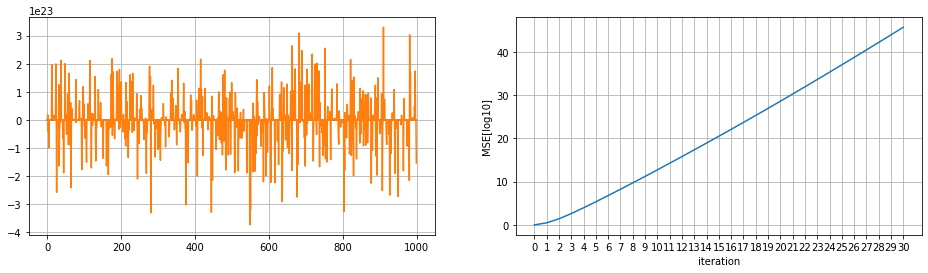

In [18]:
tmp2U.result()

final mse: 0.005325968261562635


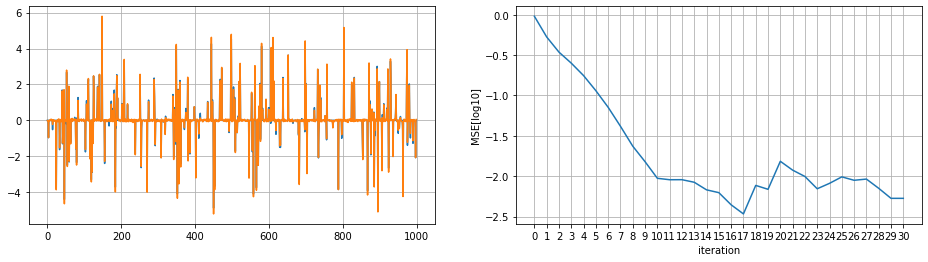

In [19]:
tmp3U.estimate(T=T)
tmp3U.result()

In [20]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp4U.estimate(T=T, C=1.85, log=True)

N(P-1): 9000


Rp: 7699.0 	 F: 374 	 F\Rp: 1036
Total Communication Cost: 8091
Rp: 7765.0 	 F: 379 	 F\Rp: 1045
Total Communication Cost: 8162
Rp: 7806.0 	 F: 384 	 F\Rp: 1036
Total Communication Cost: 8208
Rp: 7772.0 	 F: 378 	 F\Rp: 1057
Total Communication Cost: 8168
Rp: 7722.0 	 F: 383 	 F\Rp: 1067
Total Communication Cost: 8123
Rp: 7743.0 	 F: 394 	 F\Rp: 1075
Total Communication Cost: 8155
Rp: 7794.0 	 F: 382 	 F\Rp: 1027
Total Communication Cost: 8194
Rp: 7729.0 	 F: 386 	 F\Rp: 1074
Total Communication Cost: 8133
Rp: 7657.0 	 F: 408 	 F\Rp: 1151
Total Communication Cost: 8083
Rp: 7750.0 	 F: 399 	 F\Rp: 1082
Total Communication Cost: 8167
Rp: 7719.0 	 F: 383 	 F\Rp: 1058
Total Communication Cost: 8120
Rp: 7756.0 	 F: 396 	 F\Rp: 1086
Total Communication Cost: 8170
Rp: 7650.0 	 F: 406 	 F\Rp: 1133
Total Communication Cost: 8074
Rp: 7750.0 	 F: 419 	 F\Rp: 1153
Total Communication Cost: 8187
Rp: 7795.0 	 F: 389 	 F\Rp: 1035
Total Communication Cost: 8202
Rp: 7778.0 	 F: 389 	 F\R

final mse: 0.024172090523847854


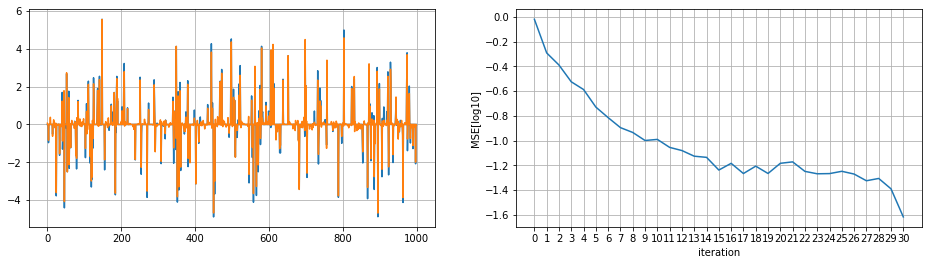

In [21]:
tmp4U.result()

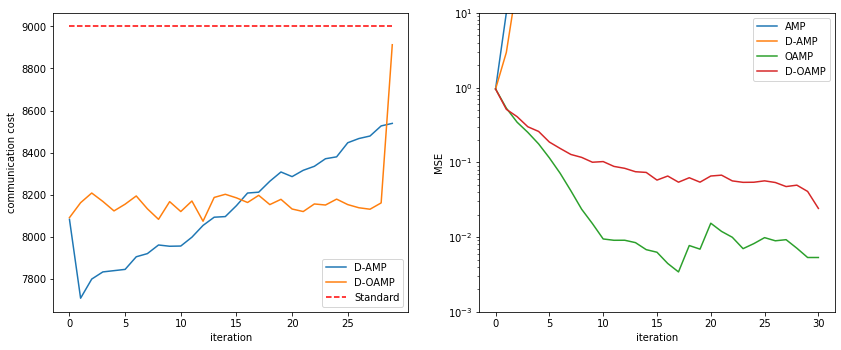

In [22]:
plt.figure(figsize=(14, 5.5))


t1 = np.arange(0, T, 1)

plt.subplot(121)
plt.xlabel('iteration')
plt.ylabel('communication cost')
plt.xticks(np.arange(0, T, 5))

standard = np.array([N * (P - 1) for _ in range(T)])

plt.plot(t1, tmp2U.communication_cost, label='D-AMP')
plt.plot(t1, tmp4U.communication_cost, label='D-OAMP')
plt.plot(t1, standard, ls='--', color='r', label='Standard')
plt.legend()


t2 = np.arange(0, T+1, 1)

plt.subplot(122)
plt.xlabel('iteration')
plt.ylabel('MSE')

plt.xticks(np.arange(0, T+1, 5))
plt.ylim(1e-3, 1e+1)
plt.yscale('log')

plt.plot(t2, tmp1U.mse, label="AMP")
plt.plot(t2, tmp2U.mse, label="D-AMP")
plt.plot(t2, tmp3U.mse, label='OAMP')
plt.plot(t2, tmp4U.mse, label='D-OAMP')
plt.legend()